In [1]:
import os
os.chdir('../../..')
import numpy as np
from rdkit.Chem import MolFromSmarts

RDKit WARNING: [13:23:35] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.inchi import MolFromInchi

import pickle
from molgrad.utils import DATA_PATH, EXAMPLE_PATH
from rdkit.Chem.rdmolops import Kekulize

In [3]:
from molgrad.vis_baseline import molecule_importance_diff
from molgrad.utils import BASELINE_MODELS_PATH
from molgrad.baseline_utils import pred_baseline

Using backend: pytorch


In [4]:
from joblib import load

model = load(os.path.join(BASELINE_MODELS_PATH, "rf_cyp.pt"))

/home/hawk31/miniconda3/envs/molgrad/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/hawk31/miniconda3/envs/molgrad/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
from rdkit.Chem import MolFromSmiles, MolToInchi
import pandas as pd

sar1 = pd.read_csv(os.path.join(DATA_PATH, 'cyp', 'cyp_sar1.csv'), sep=';')  ## nothing interesting
sar1

,substituent,SMILES,value
0,4-imidazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CNC=N1,1.60
1,3-pyrazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=NNC=C1,1.80
2,4-pyrazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CNN=C1,27.00
3,"4-(1,2,3-Triazole)",COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CNN=N1,57.00
4,"3-(1,2,4-Triazole)",COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=NNC=N1,100.00
5,5-Thiazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CN=CS1,0.77
6,5-Oxazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CN=CO1,6.50
7,3-Pyridine,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CN=CC=C1,9.40
8,4-Pyridine,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CC=NC=C1,4.50
9,4-Pyrimidine,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=NC=NC=C1,18.00


[0.399]


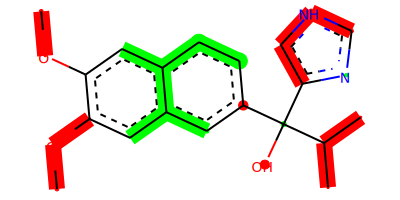

In [6]:
mol = MolFromSmiles(sar1['SMILES'][0])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.404]


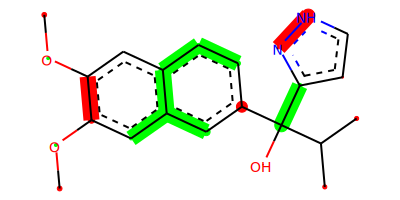

In [7]:
mol = MolFromSmiles(sar1['SMILES'][1])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.375]


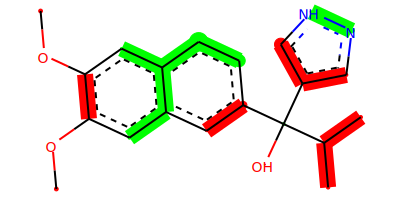

In [8]:
mol = MolFromSmiles(sar1['SMILES'][2])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.435]


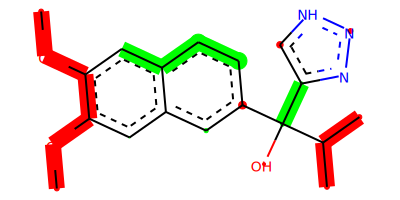

In [9]:
mol = MolFromSmiles(sar1['SMILES'][3])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.188]


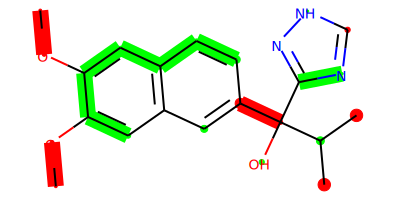

In [10]:
mol = MolFromSmiles(sar1['SMILES'][4])
Kekulize(mol)
svg_cyp_rf_neg, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


In [11]:
with open(os.path.join(EXAMPLE_PATH, "cyp_rf_neg_kekule.svg"), "w+") as handle:
    handle.write(svg_cyp_rf_neg)

[0.259]


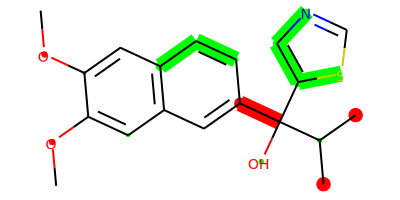

In [12]:
mol = MolFromSmiles(sar1['SMILES'][5])
Kekulize(mol)
svg_cyp_rf_pos, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


In [13]:
with open(os.path.join(EXAMPLE_PATH, "cyp_rf_pos_kekule.svg"), "w+") as handle:
    handle.write(svg_cyp_rf_pos)

[0.522]


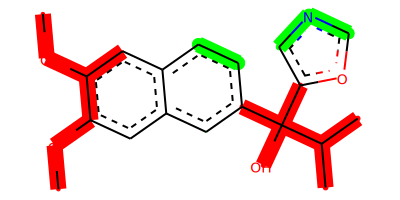

In [14]:
mol = MolFromSmiles(sar1['SMILES'][6])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.634]


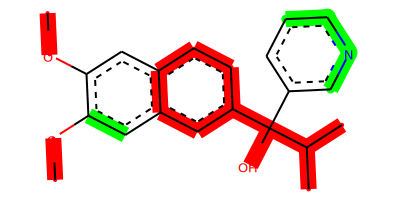

In [15]:
mol = MolFromSmiles(sar1['SMILES'][7])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.559]


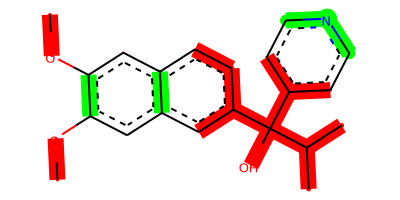

In [16]:
mol = MolFromSmiles(sar1['SMILES'][8])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.564]


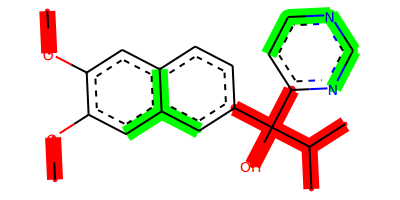

In [17]:
mol = MolFromSmiles(sar1['SMILES'][9])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


In [18]:
sar2 = pd.read_csv(os.path.join(DATA_PATH, 'cyp', 'cyp_sar2.csv'))  # nothing too interesting
sar2

,name,SMILES,ic50(um)
0,ketoconazole,CC(=O)N1CCN(CC1)c2ccc(OC[C@H]3CO[C@@](Cn4ccnc4...,0.20
1,econazole,Clc1ccc(COC(Cn2ccnc2)c3ccc(Cl)cc3Cl)cc1,0.43
2,Miconazole,Clc1ccc(COC(Cn2ccnc2)c3ccc(Cl)cc3Cl)c(Cl)c1,0.85
3,Clotrimazole,Clc1ccccc1C(n2ccnc2)(c3ccccc3)c4ccccc4,0.05
4,fluconazole,OC(Cn1cncn1)(Cn2cncn2)c3ccc(F)cc3F,25.00


[0.894]


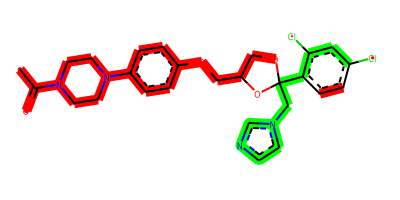

In [19]:
mol = MolFromSmiles(sar2['SMILES'][0])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.959]


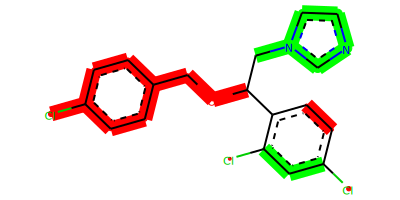

In [20]:
mol = MolFromSmiles(sar2['SMILES'][1])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img



[0.95]


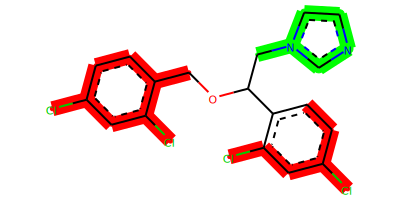

In [21]:
mol = MolFromSmiles(sar2['SMILES'][2])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img



[0.862]


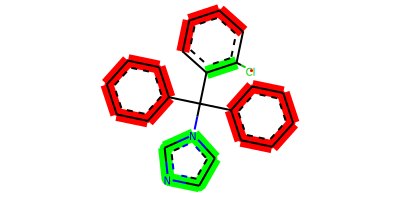

In [22]:
mol = MolFromSmiles(sar2['SMILES'][3])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.481]


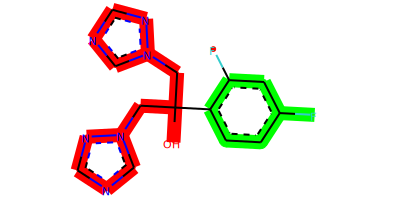

In [23]:
mol = MolFromSmiles(sar2['SMILES'][4])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


In [24]:
sar3 = pd.read_csv(os.path.join(DATA_PATH, 'cyp', 'cyp_sar3.csv'))  # can show 4-5
sar3

,name,SMILES,ic50(um)
0,pyridine,C1=CC=NC=C1,4000.00
1,aminoethylpyridine,NCCC1=CN=CC=C1,5000.00
2,5,NCCCCCC(=O)NCC1=CN=CC=C1,1000.00
3,4,CC(C)(C)OC(=O)NCCCCCC(=O)NCC1=CN=CC=C1,75.00
4,11,CC(C)(C)OC(=O)N[C@H](CSCCC(=O)NCC1=CN=CC=C1)CC...,30.00
5,15a,CC(C)(C)OC(=O)N[C@H](CSCCC(=O)NCC1=CN=CC=C1)CC...,0.52
6,15b,CC(C)(C)OC(=O)N[C@H](CSCCC(=O)NCC1=CN=CC=C1)CC...,0.21


[0.188]


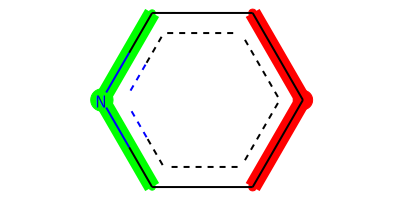

In [25]:
mol = MolFromSmiles(sar3['SMILES'][0])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img


[0.285]


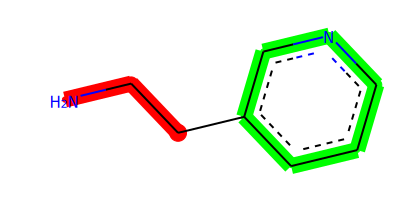

In [26]:
mol = MolFromSmiles(sar3['SMILES'][1])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img

[0.393]


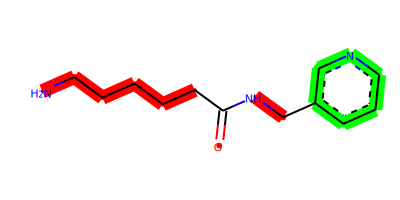

In [27]:
mol = MolFromSmiles(sar3['SMILES'][2])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img

[0.44]


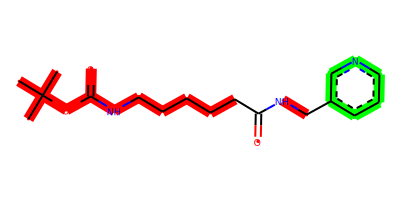

In [28]:
mol = MolFromSmiles(sar3['SMILES'][3])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img

[0.509]


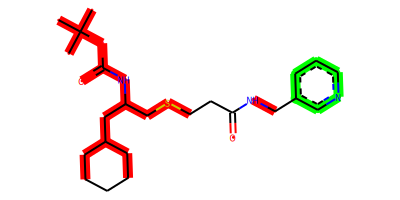

In [29]:
mol = MolFromSmiles(sar3['SMILES'][4])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img

[0.504]


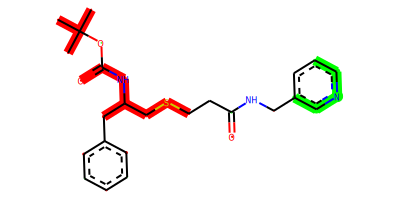

In [30]:
mol = MolFromSmiles(sar3['SMILES'][5])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img

[0.539]


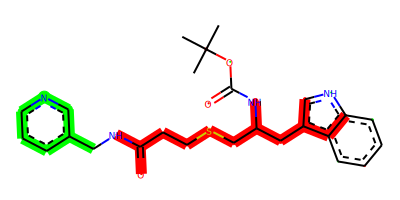

In [31]:
mol = MolFromSmiles(sar3['SMILES'][6])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img

In [32]:
sar4 = pd.read_csv(os.path.join(DATA_PATH, 'cyp', 'cyp_sar4.csv'))  # can show 4-5
sar4

,name,SMILES,ic50(um)
0,1a,OCCN1CCN(CC1)C(=O)OC[C@H]1CCC[C@H](N1S(=O)(=O...,0.06
1,1b,OCCN1CCN(CC1)C(=O)OC1(CC1)[C@H]1CCC[C@H](N1S(=...,0.30
2,2,CC(C)(CO)N1CCN(CC1)C(=O)OC1(CC1)[C@H]1CCC[C@H]...,2.20


[0.441]


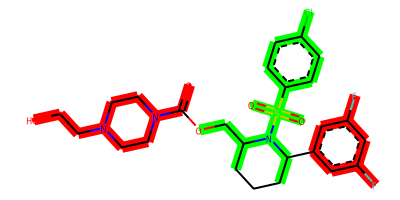

In [33]:
mol = MolFromSmiles(sar4[' SMILES'][0])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img

[0.389]


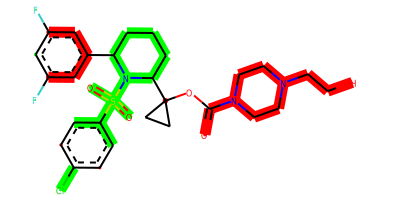

In [34]:
mol = MolFromSmiles(sar4[' SMILES'][1])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img

[0.44]


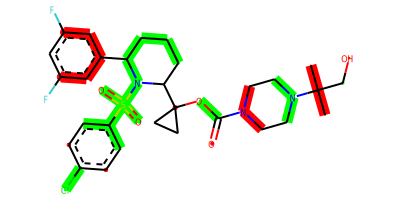

In [35]:
mol = MolFromSmiles(sar4[' SMILES'][2])
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     task="binary",
                                     addHs=False)
print(pred_baseline(mol, model, task="binary"))
img